# Likes Report
Jaclyn Bell </br>
9/14/2025

## Questions:
### Who or what is the source of your personal Instagram data? 
The sources of my personal instagram data comes mainly from liking or sharing posts. Other sources would be the things I have uploaded to the app such as photos, reels, and stories. My data also comes from sending messages or commenting on others posts. </br>
### Why was this data created and what purposes can the data serve? 
I think the data is used for a lot of reasons, for example in advertising, they can use my data to target me with ads that might spark my interset, and keep track of what I click on or buy. Or it could help them train AI algorithims so the app would suggest content to me that would increase my engagement in the app, sometimes keeping me scrolling for way too long. :) </br>
### In what ways may this data be reliable? 
The data that would be reliable would be your login information such as user name and password, or your personal phone number or email, used as sercurity for logging in or recovering your account. It could also be you behavior on the app such as the way you interact with it, through likes, and comments. </br>
### In what ways may this data be unreliable?
I think a lot of people lie in their personal information, such as names, or birthdays. Or they make burner accounts or accounts to impersonate others. And another thing that I do a lot if scroll mindlessly without actually reacting, even though I might really like what Im seeing, sometimes I just go so fast that I don't take that second to like or save the post. so this could have an effect on my data being collected. 

In [26]:
import json
import pandas as pd

from datetime import datetime

from scipy.stats import chisquare

import matplotlib.pyplot as plt

In [29]:
path = r"C:\Users\jacki\Data in EMAT\DATA INSTAGRAM\your_instagram_activity\likes\liked_posts.json"

In [30]:
liked_posts_df = pd.DataFrame(data["likes_media_likes"])

In [31]:
liked_posts_df.head()

,title,string_list_data
0,lvmandm9onprime,[{'href': 'https://www.instagram.com/reel/DNoM...
1,jenbutlersays,[{'href': 'https://www.instagram.com/reel/DNjl...
2,yoursupermindset,[{'href': 'https://www.instagram.com/reel/DNdZ...
3,boardgame_buzzz,[{'href': 'https://www.instagram.com/reel/DNs-...
4,jessicaevedesu,[{'href': 'https://www.instagram.com/reel/DNtS...


In [32]:
liked_posts_df["timestamp"] = liked_posts_df["string_list_data"].str[0].str["timestamp"]

In [39]:
liked_posts_df.head(10)

,title,string_list_data,timestamp,account
0,lvmandm9onprime,[{'href': 'https://www.instagram.com/reel/DNoM...,1756112472,ð
1,jenbutlersays,[{'href': 'https://www.instagram.com/reel/DNjl...,1756089292,ð
2,yoursupermindset,[{'href': 'https://www.instagram.com/reel/DNdZ...,1756088971,ð
3,boardgame_buzzz,[{'href': 'https://www.instagram.com/reel/DNs-...,1756075247,ð
4,jessicaevedesu,[{'href': 'https://www.instagram.com/reel/DNtS...,1756075213,ð
5,laura.henshaw,[{'href': 'https://www.instagram.com/reel/DK_q...,1756075122,ð
6,gangabala19,[{'href': 'https://www.instagram.com/reel/DNYV...,1756048222,ð
7,tokyo_thebear,[{'href': 'https://www.instagram.com/reel/DHyk...,1756048174,ð
8,zero.sleeps,[{'href': 'https://www.instagram.com/reel/DNtb...,1756048047,ð
9,fireandiceoutdoors,[{'href': 'https://www.instagram.com/reel/DNsY...,1756048001,ð


In [54]:
liked_posts_df["account"] = liked_posts_df["string_list_data"].str[0].str["value"]

In [55]:
likes_by_account = liked_posts_df.groupby("account")["timestamp"].count().reset_index()

In [56]:
likes_by_account = likes_by_account.rename(columns={"timestamp": "like_count"})

In [57]:
likes_by_account = likes_by_account.sort_values("like_count", ascending=False)

In [59]:
likes_by_account.head()

,account,like_count
0,ð,23655


### Hypothesis
I tend to scroll through Instagram and like posts more in the evening compared to the morning. 

In [61]:
liked_posts_df = pd.DataFrame(data["likes_media_likes"])

In [62]:
liked_posts_df = liked_posts_df.join(
    pd.json_normalize(liked_posts_df["string_list_data"].str[0])
).drop(columns=["string_list_data"])

In [63]:
liked_posts_df.rename(columns={"value": "account"}, inplace=True)

In [64]:
liked_posts_df.head()

,title,href,account,timestamp
0,lvmandm9onprime,https://www.instagram.com/reel/DNoMzVUI5tW/,ð,1756112472
1,jenbutlersays,https://www.instagram.com/reel/DNjlAMbxiEu/,ð,1756089292
2,yoursupermindset,https://www.instagram.com/reel/DNdZwu2IhQf/,ð,1756088971
3,boardgame_buzzz,https://www.instagram.com/reel/DNs-Ax84lVg/,ð,1756075247
4,jessicaevedesu,https://www.instagram.com/reel/DNtSgCC3jrx/,ð,1756075213


In [65]:
liked_posts_df["datetime"] = pd.to_datetime(liked_posts_df["timestamp"], unit="s")

In [66]:
liked_posts_df["hour"] = liked_posts_df["datetime"].dt.hour

In [67]:
liked_posts_df.head()

,title,href,account,timestamp,datetime,hour
0,lvmandm9onprime,https://www.instagram.com/reel/DNoMzVUI5tW/,ð,1756112472,2025-08-25 09:01:12,9
1,jenbutlersays,https://www.instagram.com/reel/DNjlAMbxiEu/,ð,1756089292,2025-08-25 02:34:52,2
2,yoursupermindset,https://www.instagram.com/reel/DNdZwu2IhQf/,ð,1756088971,2025-08-25 02:29:31,2
3,boardgame_buzzz,https://www.instagram.com/reel/DNs-Ax84lVg/,ð,1756075247,2025-08-24 22:40:47,22
4,jessicaevedesu,https://www.instagram.com/reel/DNtSgCC3jrx/,ð,1756075213,2025-08-24 22:40:13,22


In [68]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return "morning"
    elif 18 <= hour < 24:
        return "evening"
    else:
        return "other"

In [69]:
liked_posts_df["time_of_day"] = liked_posts_df["hour"].apply(time_of_day)

In [70]:
liked_posts_df.head()

,title,href,account,timestamp,datetime,hour,time_of_day
0,lvmandm9onprime,https://www.instagram.com/reel/DNoMzVUI5tW/,ð,1756112472,2025-08-25 09:01:12,9,morning
1,jenbutlersays,https://www.instagram.com/reel/DNjlAMbxiEu/,ð,1756089292,2025-08-25 02:34:52,2,other
2,yoursupermindset,https://www.instagram.com/reel/DNdZwu2IhQf/,ð,1756088971,2025-08-25 02:29:31,2,other
3,boardgame_buzzz,https://www.instagram.com/reel/DNs-Ax84lVg/,ð,1756075247,2025-08-24 22:40:47,22,evening
4,jessicaevedesu,https://www.instagram.com/reel/DNtSgCC3jrx/,ð,1756075213,2025-08-24 22:40:13,22,evening


In [71]:
likes_by_time = liked_posts_df["time_of_day"].value_counts()
print(likes_by_time)

time_of_day
other      12516
evening     7842
morning     3297
Name: count, dtype: int64


In [72]:
import matplotlib.pyplot as plt

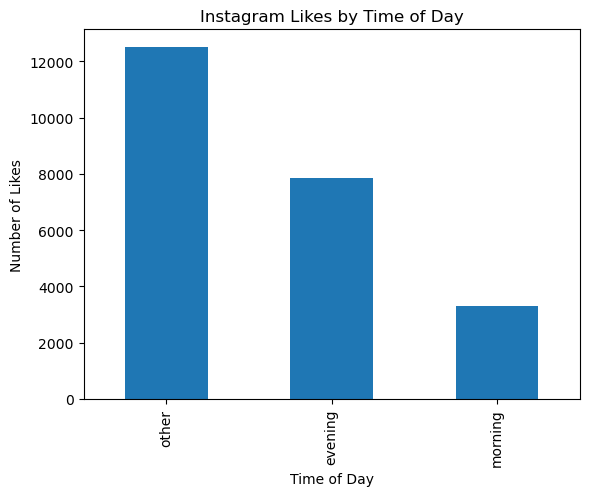

In [73]:
likes_by_time.plot(kind="bar", title="Instagram Likes by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Likes")
plt.show()

So this did prove my hypothises, that I scroll and like posts more in the evening than the morning. But I think this is saying that I do most of my scrolling and liking in the middle (other) part of the day. 